In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [3]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [4]:
#matplotlib 패키지 한글 깨짐 처리 시작
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [5]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')

In [6]:
#매출금액 단위 만원으로 변환 
data['매출금액'] = data['매출금액']/10000
data.rename(columns={'매출금액' : '매출금액(단위:만원)'}, inplace=True)
#매출 건수 한 건당 매출금액 컬럼 추가
data['건당 매출금액(단위:만원)'] = data['매출금액(단위:만원)']/data['매출건수']

In [7]:
data_s = data[data['품목대분류명'] == '여가/스포츠']

In [8]:
data_s['성별'].value_counts()

여성    37808
남성    29423
Name: 성별, dtype: int64

In [9]:
data_s['성별'].groupby(data_s['품목중분류명']).value_counts()

품목중분류명  성별
레저      여성     2750
        남성     2589
문화      여성     6051
        남성     2850
스포츠     여성     6031
        남성     4244
여행      여성    10217
        남성     9072
취미/특기   여성    12759
        남성    10668
Name: 성별, dtype: int64

<AxesSubplot:xlabel='기준년월', ylabel='count'>

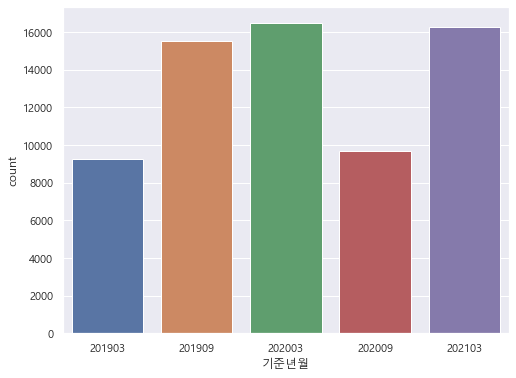

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '기준년월', data = data_s)

In [11]:
data_df = pd.DataFrame(data_s)

In [12]:
#월별 barplot
def get_barplot_C_M(category):
    dfLC = data_df[['기준년월', '품목대분류명','품목중분류명','매출건수']]
    dfLC_bar = dfLC[dfLC['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '매출건수', hue = '기준년월', data = dfLC_bar, edgecolor = 'black')

def get_barplot_M_M(category):
    dfLM = data_df[['기준년월', '품목대분류명','품목중분류명','매출금액(단위:만원)']]
    dfLM_bar = dfLM[dfLM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '기준년월', data = dfLM_bar, edgecolor = 'black')
def get_barplot_CM_M(category):
    dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명','건당 매출금액(단위:만원)']]
    dfCM_bar = dfCM[dfCM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (8, 6))
    sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '기준년월', data = dfCM_bar, edgecolor = 'black')

<AxesSubplot:xlabel='품목중분류명', ylabel='건당 매출금액(단위:만원)'>

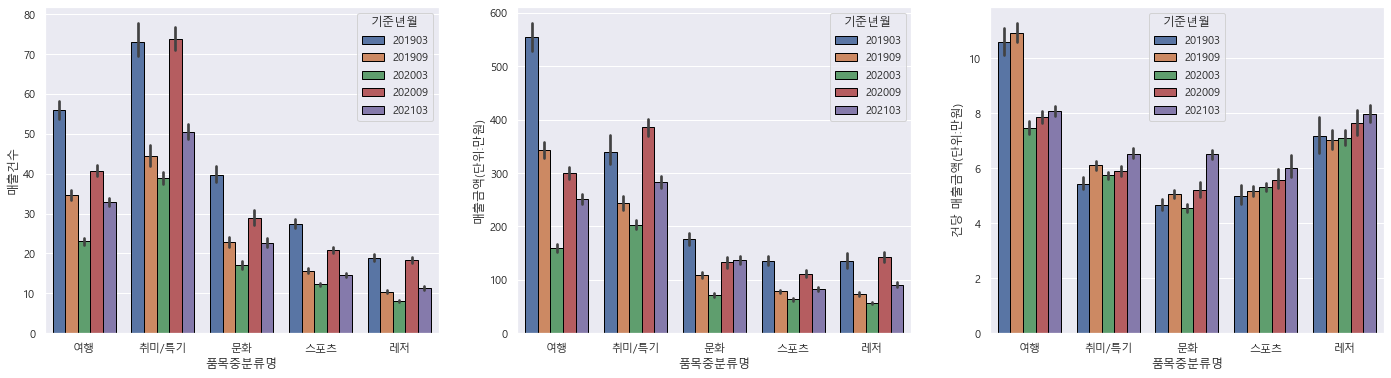

In [13]:
figure,((ax1,ax2,ax3))=plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(24,6)
dfLC = data_df[['기준년월', '품목대분류명','품목중분류명','매출건수']]
dfLC_bar = dfLC[dfLC['품목대분류명'] == '여가/스포츠']
sns.barplot(x = '품목중분류명', y = '매출건수', hue = '기준년월', data = dfLC_bar, edgecolor = 'black',ax=ax1)

dfLM = data_df[['기준년월', '품목대분류명','품목중분류명','매출금액(단위:만원)']]
dfLM_bar = dfLM[dfLM['품목대분류명'] =='여가/스포츠']

sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '기준년월', data = dfLM_bar, edgecolor = 'black',ax=ax2)
dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명','건당 매출금액(단위:만원)']]
dfCM_bar = dfCM[dfCM['품목대분류명'] == '여가/스포츠']
sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '기준년월', data = dfCM_bar, edgecolor = 'black',ax=ax3)

In [14]:
#매출건수 baplot
#get_barplot_C_M('여가/스포츠')

#매출금액 barplot
#get_barplot_M_M('여가/스포츠')

#건당 매출금액 평균 barplot
#get_barplot_CM_M('여가/스포츠')

In [15]:
#성별 barplot
def get_barplot_C_S(category):
    dfLC = data_df[['기준년월', '품목대분류명', '성별','품목중분류명','매출건수']]
    dfLC_bar = dfLC[dfLC['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (4, 3))
    sns.barplot(x = '품목중분류명', y = '매출건수', hue = '성별', data = dfLC_bar, edgecolor = 'black')

def get_barplot_M_S(category):
    dfLM = data_df[['기준년월', '품목대분류명','성별','품목중분류명','매출금액(단위:만원)']]
    dfLM_bar = dfLM[dfLM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (4, 3))
    sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '성별', data = dfLM_bar, edgecolor = 'black')

def get_barplot_CM_S(category):
    dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명', '성별', '건당 매출금액(단위:만원)']]
    dfCM_bar = dfCM[dfCM['품목대분류명'] == category]
    fig, ax = plt.subplots(1, 1, figsize = (4, 3))
    sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '성별', data = dfCM_bar, edgecolor = 'black')

<AxesSubplot:xlabel='품목중분류명', ylabel='건당 매출금액(단위:만원)'>

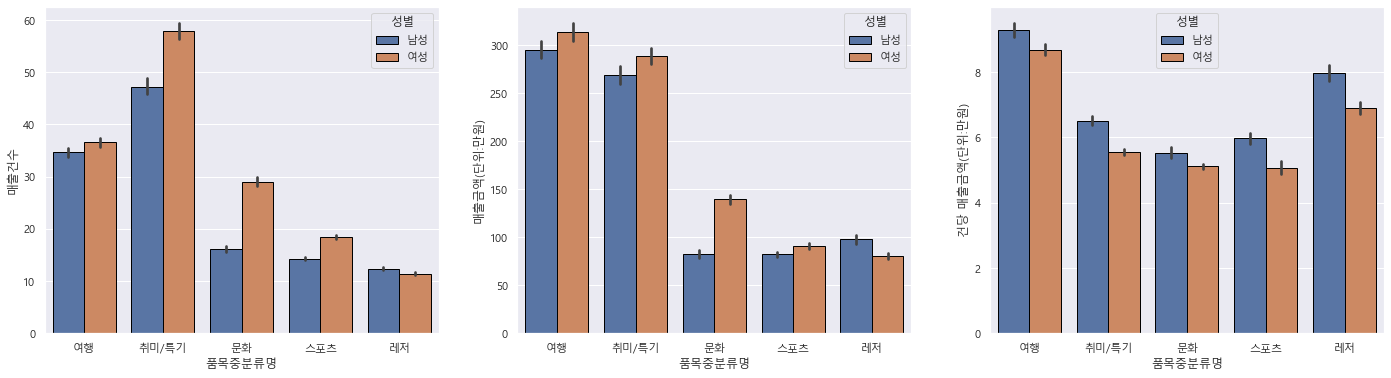

In [16]:
figure,((ax1,ax2,ax3))=plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(24,6)
dfLC = data_df[['기준년월', '품목대분류명', '성별','품목중분류명','매출건수']]
dfLC_bar = dfLC[dfLC['품목대분류명'] == '여가/스포츠']
sns.barplot(x = '품목중분류명', y = '매출건수', hue = '성별', data = dfLC_bar, edgecolor = 'black',ax=ax1)
dfLM = data_df[['기준년월', '품목대분류명','성별','품목중분류명','매출금액(단위:만원)']]
dfLM_bar = dfLM[dfLM['품목대분류명'] =='여가/스포츠']
sns.barplot(x = '품목중분류명', y = '매출금액(단위:만원)', hue = '성별', data = dfLM_bar, edgecolor = 'black',ax=ax2)
dfCM = data_df[['기준년월', '품목대분류명', '품목중분류명', '성별', '건당 매출금액(단위:만원)']]
dfCM_bar = dfCM[dfCM['품목대분류명'] == '여가/스포츠']
sns.barplot(x = '품목중분류명', y = '건당 매출금액(단위:만원)', hue = '성별', data = dfCM_bar, edgecolor = 'black',ax=ax3)

In [17]:

#매출건수 성별 중분류
#get_barplot_C_S('여가/스포츠')

#매출금액 성별 중분류
#get_barplot_M_S('여가/스포츠')

#건당 매출금액 성별 중분류
#get_barplot_CM_S('여가/스포츠')
#건당 매출금액은 남성이 더 높음

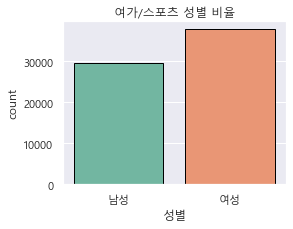

In [18]:
#여가/스포츠 성별 비율
fig, ax = plt.subplots(1, 1, figsize = (4, 3))
sns.countplot(x = '성별', data = data_s, edgecolor= 'black', palette='Set2')
ax.set_title('여가/스포츠 성별 비율')
plt.show()

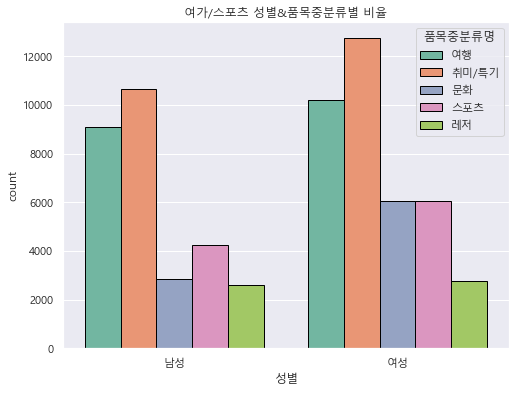

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '성별', data = data_s, edgecolor= 'black', palette='Set2', hue = '품목중분류명')
ax.set_title('여가/스포츠 성별&품목중분류별 비율')
plt.show()

#남성이 문화를 즐기는게 낮음

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (4).

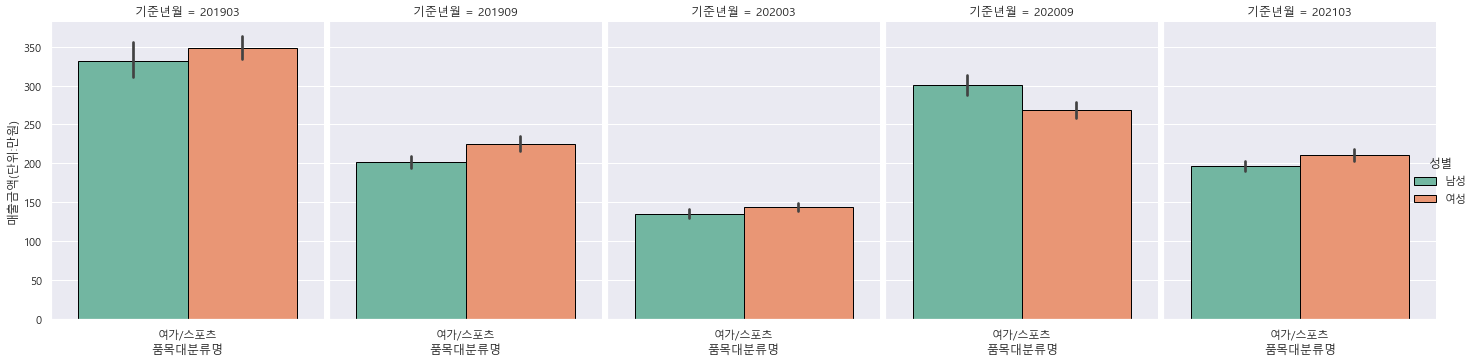

In [174]:
f=sns.factorplot(x = '품목대분류명',y = '매출금액(단위:만원)', data = data_s, edgecolor= 'black', palette='Set2', \
    hue = '성별', col = '기준년월', kind = 'bar', aspect = 2)
f.fig.set_size_inches(20, 5)
f.set_xticklabels(['e상품/서비스','전자','여가/스포츠','식품'], fontsize= 15)
plt.show()

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


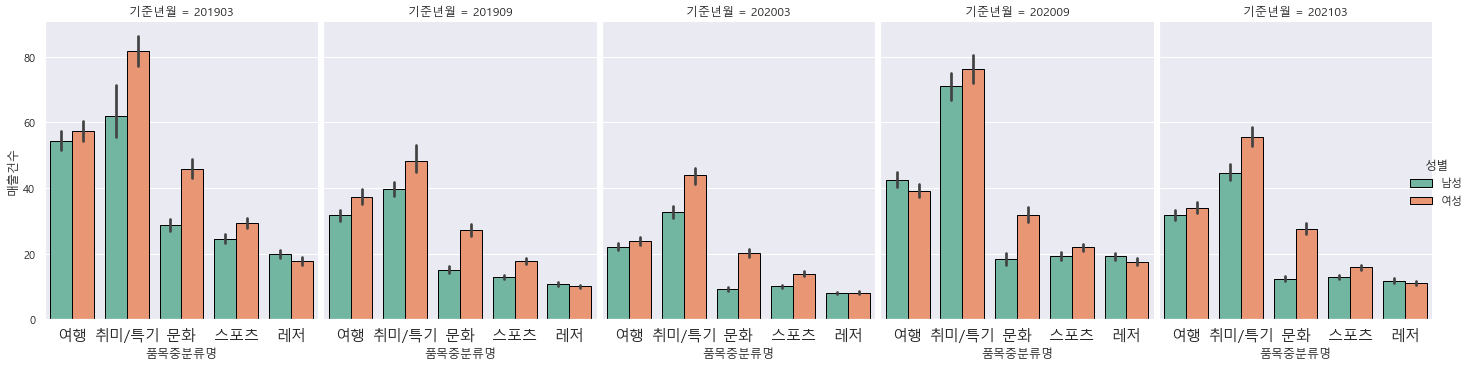

In [69]:
f=sns.factorplot(x = '품목중분류명',y = '매출건수', data = data_s, edgecolor= 'black', palette='Set2', hue = '성별', col = '기준년월', kind = 'bar', aspect = 2)
f.fig.set_size_inches(20, 5)
f.set_xticklabels(['여행','취미/특기','문화','스포츠','레저'], fontsize= 15)
plt.show()

#20- 9월에 남성의 여가/스포츠의 여행, 취미/특기 매출금액의 평균이 높아짐 -> 이유찾아보기

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


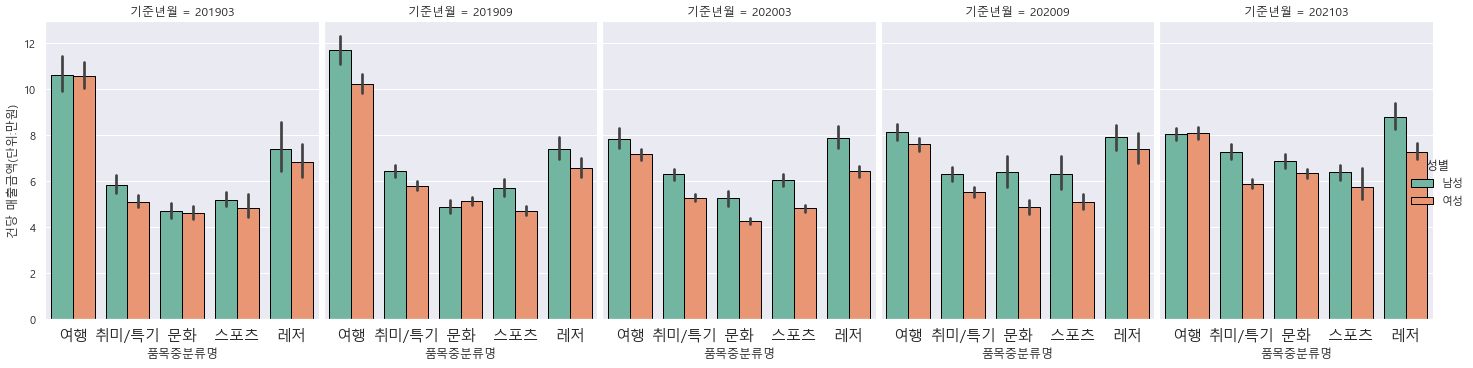

In [70]:
f=sns.factorplot(x = '품목중분류명',y = '건당 매출금액(단위:만원)', data = data_s, edgecolor= 'black', palette='Set2', hue = '성별', col = '기준년월', kind = 'bar', aspect = 2)
f.fig.set_size_inches(20, 5)
f.set_xticklabels(['여행','취미/특기','문화','스포츠','레저'], fontsize= 15)
plt.show()

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


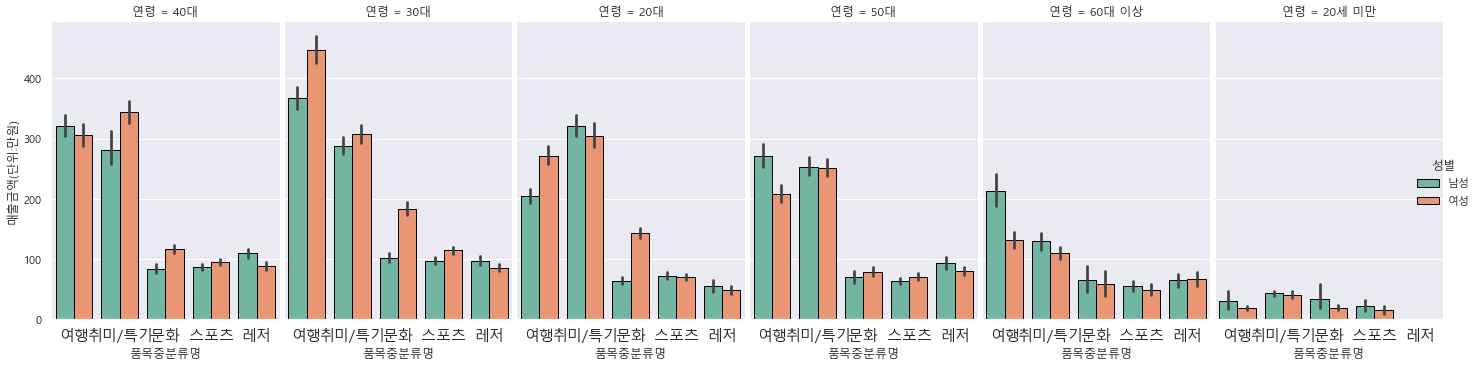

In [71]:
f=sns.factorplot(x = '품목중분류명',y = '매출금액(단위:만원)', data = data_s, edgecolor= 'black', palette='Set2', hue = '성별', col = '연령', kind = 'bar', aspect = 2)
f.fig.set_size_inches(20,5)
f.set_xticklabels(['여행','취미/특기','문화','스포츠','레저'], fontsize= 15)
plt.show()
#40대 이후부터 남성의 매출금액 평균이 여성보다 더 높아짐

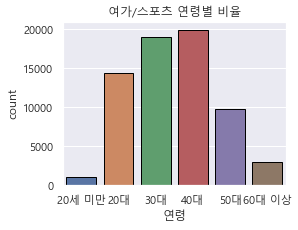

In [24]:
#여가/스포츠 연령별 건수 비율
group_names = ['20세 미만', '20대', '30대', '40대', '50대', '60대 이상']
fig, ax = plt.subplots(1, 1, figsize = (4,3))
sns.countplot(x = '연령', data = data_s, edgecolor = 'black', order=group_names)
ax.set_title('여가/스포츠 연령별 비율')
plt.show()

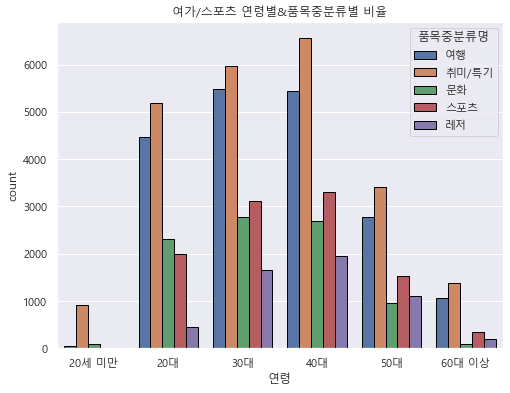

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (8,6))
sns.countplot(x = '연령', data = data_s, edgecolor= 'black', hue = '품목중분류명', order=group_names)
ax.set_title('여가/스포츠 연령별&품목중분류별 비율')
plt.show()

#20대만 문화가 스포츠보다 높다.

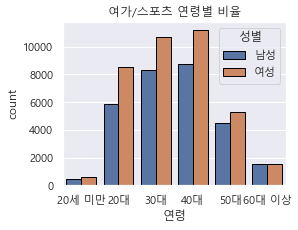

In [26]:
#여가/스포츠 성별&연령별 건수 비율
fig, ax = plt.subplots(1, 1, figsize = (4 ,3))
sns.countplot(x = '연령', data = data_s, hue = '성별', edgecolor = 'black', order=group_names)
ax.set_title('여가/스포츠 연령별 비율')
plt.show()

In [27]:
data_s['고객소재지_광역시도'].value_counts()
#사람수는 경기도가 인천보다 2배이상 많음

서울특별시    39809
경기도      18337
인천광역시     9085
Name: 고객소재지_광역시도, dtype: int64

In [28]:
data_s['매출건수'].groupby(data_s['고객소재지_광역시도']).sum()
#사람 수 대비 매출건수는 인천이 더 많음 

고객소재지_광역시도
경기도       537004
서울특별시    1517141
인천광역시     334826
Name: 매출건수, dtype: int64

In [29]:
data_s['매출건수'].groupby(data_s['고객소재지_광역시도']).mean()
#사람 수 대비 매출건수는 인천이 더 많음 

고객소재지_광역시도
경기도      29.285270
서울특별시    38.110503
인천광역시    36.854816
Name: 매출건수, dtype: float64

In [30]:
data_s['매출금액(단위:만원)'].groupby(data_s['고객소재지_광역시도']).mean()
#매출금액의 평균도 인천이 더 많음

고객소재지_광역시도
경기도      186.302407
서울특별시    241.595289
인천광역시    202.044694
Name: 매출금액(단위:만원), dtype: float64

In [31]:
data_s['건당 매출금액(단위:만원)'].groupby(data_s['고객소재지_광역시도']).mean()

고객소재지_광역시도
경기도      6.720142
서울특별시    7.002696
인천광역시    5.875039
Name: 건당 매출금액(단위:만원), dtype: float64

Text(0.5, 1.0, '광역시도별 건당 매출금액 평균')

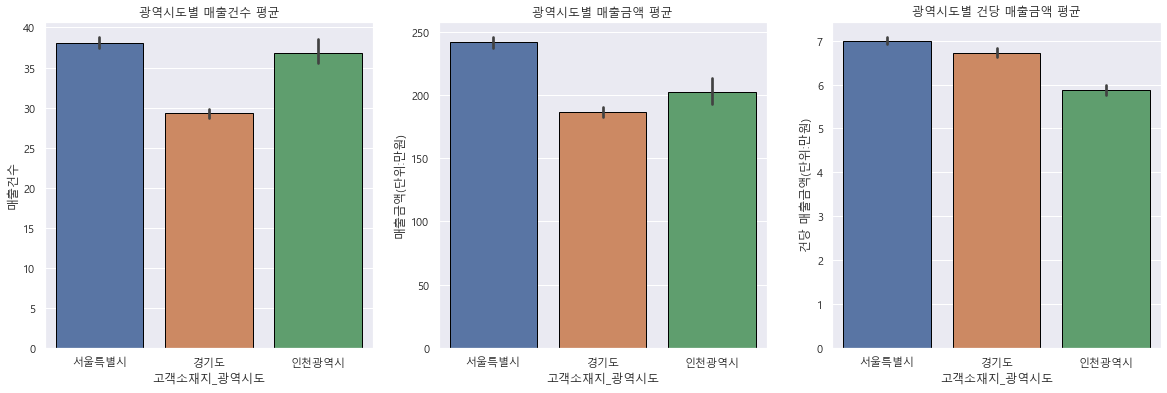

In [32]:
#위 사실을 조금 더 명확하게 확인하기 위해 시각화

#매출건수 평균 baplot
fig, ax = plt.subplots(figsize = (20, 6), ncols= 3)
sns.barplot(x = '고객소재지_광역시도', y = '매출건수', data = data_s, ax = ax[0], edgecolor = 'black')
ax[0].set_title('광역시도별 매출건수 평균')

#매출금액 평균 barplot
sns.barplot(x = '고객소재지_광역시도', y = '매출금액(단위:만원)', data = data_s, ax = ax[1], edgecolor = 'black')
ax[1].set_title('광역시도별 매출금액 평균')

#건당 매출금액 평균 barplot
sns.barplot(x = '고객소재지_광역시도', y = '건당 매출금액(단위:만원)', data = data_s, ax = ax[2], edgecolor = 'black')
ax[2].set_title('광역시도별 건당 매출금액 평균')

In [33]:
data_s['고객소재지_광역시도'].value_counts()
#사람수는 경기도가 인천보다 2배이상 많음

서울특별시    39809
경기도      18337
인천광역시     9085
Name: 고객소재지_광역시도, dtype: int64

Text(0, 0.5, '광역시도별 결제건수 = 사람수')

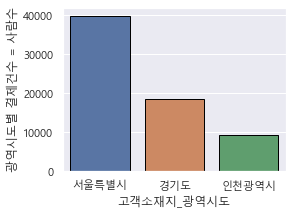

In [34]:
#반면에 인천의 사람 수는 훨씬 적음
fig, ax = plt.subplots(1, 1, figsize = (4 ,3))
sns.countplot(x = '고객소재지_광역시도', data = data_s, edgecolor = 'black')
ax.set_ylabel('광역시도별 결제건수 = 사람수')


### 결론 : 경기도 사람이 인천 & 서울시보다 여가/스포츠에 쓰는 돈도 적음

### 생각보다 인천광역시 사람들이 여가/스포츠에 쓰는 돈이 많다.

In [35]:
### 지역(구)에 따라서 중분류의 차이 비교하기 ###

data_s_Seoul = data_s[data_s['고객소재지_광역시도'] == '서울특별시']
df1 = pd.DataFrame(data_s_Seoul['고객소재지_시군구'].value_counts())
df1.sort_values(by = ['고객소재지_시군구'], axis=0, inplace=True)
df1.reset_index(inplace=True)
df1.rename(columns={'index' : '고객소재지_시군구', '고객소재지_시군구' : '합계'}, inplace=True)
df1

,고객소재지_시군구,합계
0,중구,639
1,금천구,725
2,강북구,829
3,종로구,848
4,도봉구,932
5,관악구,939
6,양천구,1050
7,중랑구,1268
8,노원구,1393
9,광진구,1421


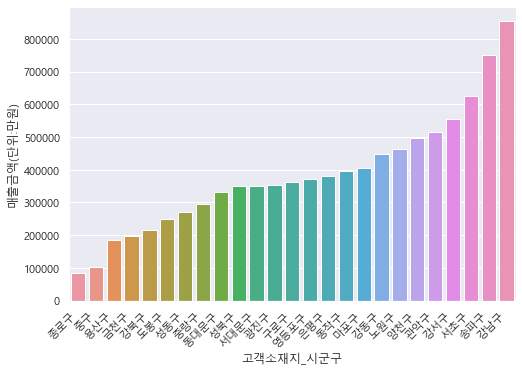

In [36]:
df = pd.DataFrame(data_s_Seoul['매출금액(단위:만원)'].groupby(data_s_Seoul['고객소재지_시군구']).sum())
df.reset_index(inplace=True)
df.sort_values(by = '매출금액(단위:만원)', axis = 0, inplace= True)
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.barplot(x = '고객소재지_시군구', y = '매출금액(단위:만원)', data= df)
fig.autofmt_xdate(rotation = 45)

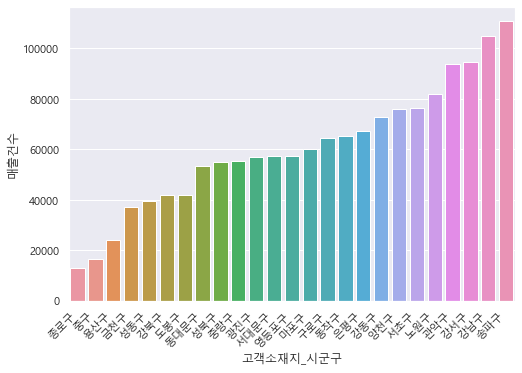

In [37]:
df = pd.DataFrame(data_s_Seoul['매출건수'].groupby(data_s_Seoul['고객소재지_시군구']).sum())
df.reset_index(inplace=True)
df.sort_values(by = '매출건수', axis = 0, inplace= True)
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.barplot(x = '고객소재지_시군구', y = '매출건수', data= df)
fig.autofmt_xdate(rotation = 45)

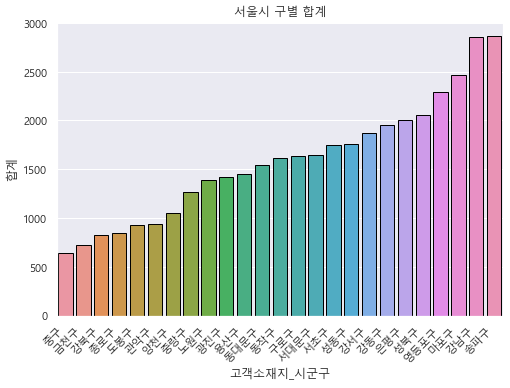

In [38]:
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.barplot(x = '고객소재지_시군구', y = '합계',data = df1, edgecolor = 'black')
ax.set_title('서울시 구별 합계')

fig.autofmt_xdate(rotation = 45)
plt.show()

In [39]:
###매출금액 평균도 비교하기 ###
df = pd.DataFrame(data_s_Seoul['매출금액(단위:만원)'].groupby(data_s_Seoul['고객소재지_시군구']).mean())
df.sort_values(by = ['매출금액(단위:만원)'], inplace=True)
df.reset_index(inplace=True)
df

,고객소재지_시군구,매출금액(단위:만원)
0,종로구,99.896318
1,용산구,127.699269
2,성동구,154.892053
3,중구,161.024703
4,영등포구,162.190410
5,마포구,164.574005
6,성북구,169.605911
7,은평구,189.860077
8,서대문구,212.341666
9,동대문구,213.920676


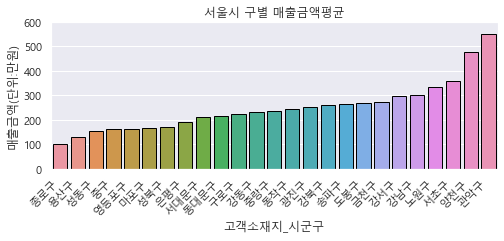

In [40]:
fig, ax = plt.subplots(1, 1, figsize = (8,3))
sns.barplot(x = '고객소재지_시군구', y = '매출금액(단위:만원)',data = df, edgecolor = 'black')
ax.set_title('서울시 구별 매출금액평균')
ax.set(ylim = [0, 600])
fig.autofmt_xdate(rotation = 45)
plt.show()


#관악구,양천구는 여가/스포츠 결제한 사람 수 대비 매출금액의 합계가 높다.(매출금액 평균 = 매출금액 총합 / 결제한 사람수)

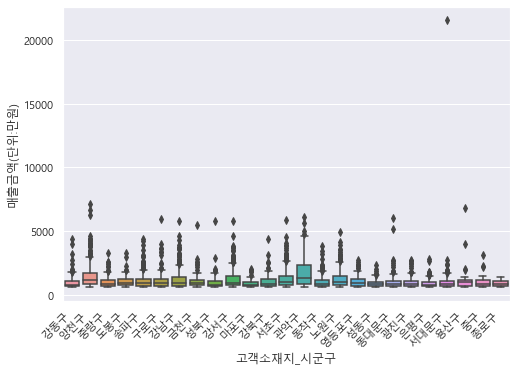

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액(단위:만원),매출건수,건당 매출금액(단위:만원)
15,201903,20,여가/스포츠,2013,여행,여성,40대,초중고자녀가구,서울특별시,강동구,길동,1110.1555,50,22.203110
25,201903,20,여가/스포츠,2013,여행,남성,40대,초중고자녀가구,서울특별시,강동구,길동,721.1315,108,6.677144
27,201903,20,여가/스포츠,2013,여행,여성,30대,신혼영유아가구,서울특별시,강동구,길동,1186.2723,133,8.919341
80,201903,20,여가/스포츠,2012,문화,남성,50대,초중고자녀가구,서울특별시,양천구,목동,1444.7002,163,8.863191
85,201903,20,여가/스포츠,2013,여행,여성,30대,신혼영유아가구,서울특별시,양천구,목동,1751.3627,292,5.997817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517070,202103,20,여가/스포츠,2014,취미/특기,여성,40대,신혼영유아가구,서울특별시,성북구,종암동,685.6103,40,17.140258
517108,202103,20,여가/스포츠,2014,취미/특기,남성,40대,초중고자녀가구,서울특별시,노원구,중계동,832.7493,453,1.838299
517120,202103,20,여가/스포츠,2014,취미/특기,여성,40대,성인자녀가구,서울특별시,광진구,중곡동,804.2413,38,21.164245
517325,202103,20,여가/스포츠,2010,스포츠,여성,30대,신혼영유아가구,서울특별시,강서구,화곡동,708.6050,153,4.631405


In [41]:
def cut_point(quanti, data):
    a = quanti
    cut_po=data['매출금액(단위:만원)'].quantile(a)
    df_cut=data[data['매출금액(단위:만원)'] > cut_po]
    fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
    sns.boxplot(x = '고객소재지_시군구', y = '매출금액(단위:만원)', data = df_cut)
    fig.autofmt_xdate(rotation = 45)
    plt.show()
    return df_cut

cut_point(0.90, data_s_Seoul)

#상위 10% 관악구 -> 10% 소비한 사람들의 소비 패턴에 따라서도 주식이 변동했는지

In [42]:
## 건당 매출금액 ##
df = pd.DataFrame(data_s_Seoul['건당 매출금액(단위:만원)'].groupby(data_s_Seoul['고객소재지_시군구']).mean())
df.sort_values(by = ['건당 매출금액(단위:만원)'], inplace=True)
df.reset_index(inplace=True)

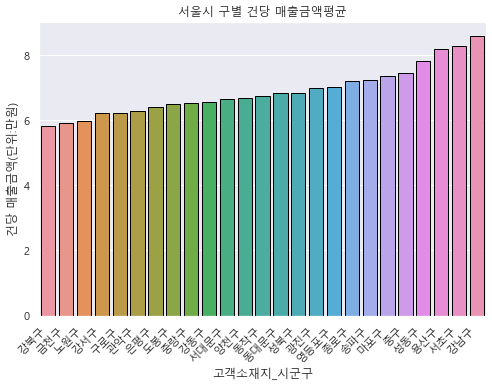

In [43]:
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.barplot(x = '고객소재지_시군구', y = '건당 매출금액(단위:만원)',data = df, edgecolor = 'black')
ax.set_title('서울시 구별 건당 매출금액평균')
fig.autofmt_xdate(rotation = 45)
plt.show()


#여가/스포츠 주요 구 : 강남구/ 의외로 관악구, 양천구에서 결제건수는 적으나 매출금액의 평균이 높다

In [44]:
data_s_Gyeong = data_s[data_s['고객소재지_광역시도'] == '경기도']

In [45]:
data_s_Incheon = data_s[data_s['고객소재지_광역시도'] == '인천광역시']

Text(0.5, 1.0, '인천광역시 품목중분류')

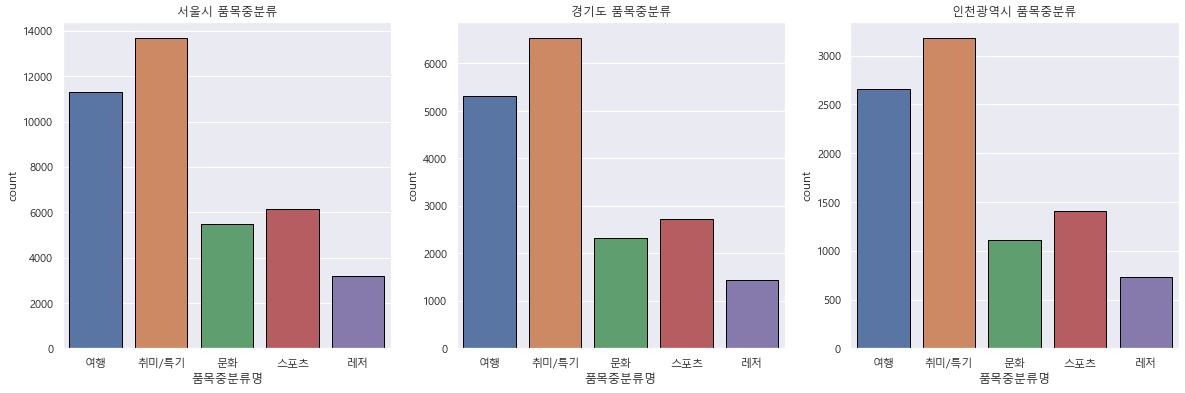

In [46]:
fig, ax = plt.subplots(figsize = (20, 6), ncols= 3)
group_names = ['여행', '취미/특기', '문화', '스포츠', '레저']

#서울시 중분류
sns.countplot(x = '품목중분류명', data = data_s_Seoul, ax = ax[0], edgecolor = 'black', order=group_names)
ax[0].set_title('서울시 품목중분류')

#경기도 중분류
sns.countplot(x = '품목중분류명', data = data_s_Gyeong, ax = ax[1], edgecolor = 'black', order=group_names)
ax[1].set_title('경기도 품목중분류')

#인천광역시 중분류
sns.countplot(x = '품목중분류명', data = data_s_Incheon, ax = ax[2], edgecolor = 'black', order= group_names)
ax[2].set_title('인천광역시 품목중분류')

In [47]:
data_s_Seoul.sort_values(by = ['성별'],inplace=True)
data_s_Gyeong.sort_values(by = ['성별'], inplace=True)
data_s_Incheon.sort_values(by = ['성별'], inplace=True)

<ipython-input-47-03b4f2534884>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Seoul.sort_values(by = ['성별'],inplace=True)
<ipython-input-47-03b4f2534884>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Gyeong.sort_values(by = ['성별'], inplace=True)
<ipython-input-47-03b4f2534884>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Incheon.sort_values(by = ['성별'], inplace=True)


Text(0.5, 1.0, '인천광역시 품목중분류')

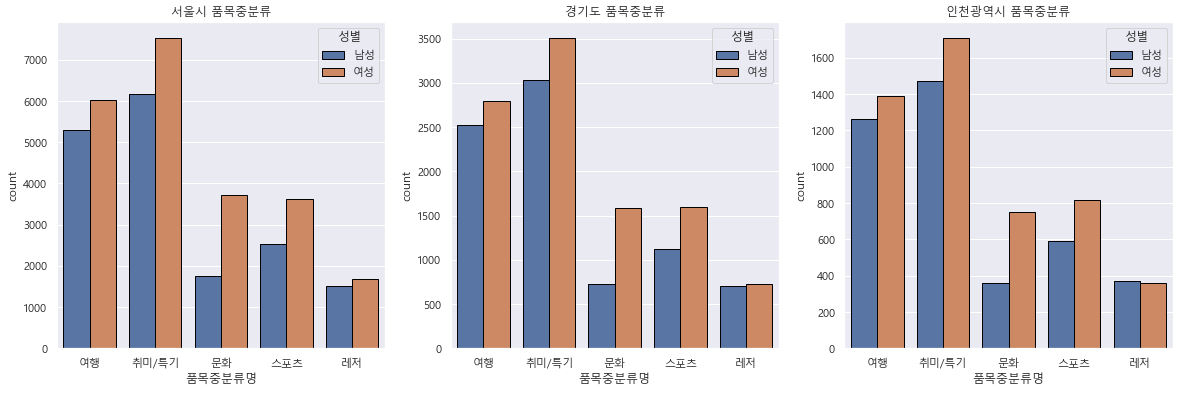

In [48]:
#지역 & 성별
#서울시 중분류
fig, ax = plt.subplots(figsize = (20, 6), ncols= 3)
group_names = ['여행', '취미/특기', '문화', '스포츠', '레저']
sns.countplot(x = '품목중분류명', data = data_s_Seoul, ax = ax[0],edgecolor = 'black', order=group_names, hue = '성별')
ax[0].set_title('서울시 품목중분류')

#경기도 중분류
sns.countplot(x = '품목중분류명', data = data_s_Gyeong, ax = ax[1],edgecolor = 'black', order=group_names,hue = '성별')
ax[1].set_title('경기도 품목중분류')

#인천광역시 중분류
sns.countplot(x = '품목중분류명', data = data_s_Incheon, ax = ax[2], edgecolor = 'black', order= group_names, hue = '성별')
ax[2].set_title('인천광역시 품목중분류')


#도시별 패턴이 비슷

<ipython-input-49-55130117f71f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Seoul.sort_values(by = ['연령'], inplace=True)
<ipython-input-49-55130117f71f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Gyeong.sort_values(by = ['연령'], inplace=True)
<ipython-input-49-55130117f71f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Incheon.sort_values(by = ['연령'], inplace=True)


Text(0.5, 1.0, '인천광역시 품목중분류')

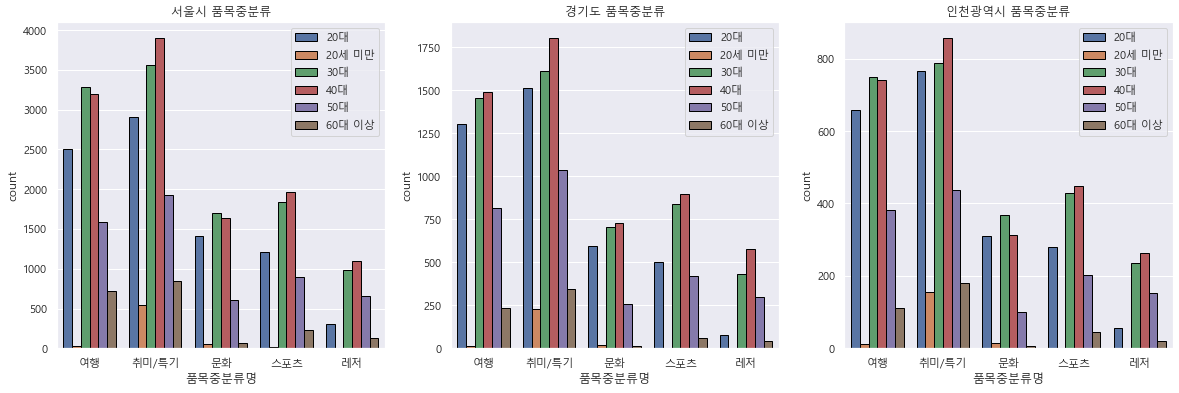

In [49]:
#지역 & 연령
data_s_Seoul.sort_values(by = ['연령'], inplace=True)
data_s_Gyeong.sort_values(by = ['연령'], inplace=True)
data_s_Incheon.sort_values(by = ['연령'], inplace=True)

#서울시 중분류
fig, ax = plt.subplots(figsize = (20, 6), ncols= 3)
group_names = ['여행', '취미/특기', '문화', '스포츠', '레저']
sns.countplot(x = '품목중분류명', data = data_s_Seoul, ax = ax[0],edgecolor = 'black', order=group_names, hue = '연령')
ax[0].legend(loc = 'upper right')
ax[0].set_title('서울시 품목중분류')

#경기도 중분류
sns.countplot(x = '품목중분류명', data = data_s_Gyeong, ax = ax[1],edgecolor = 'black', order=group_names,hue = '연령')
ax[1].legend(loc = 'upper right')
ax[1].set_title('경기도 품목중분류')

#인천광역시 중분류
sns.countplot(x = '품목중분류명', data = data_s_Incheon, ax = ax[2], edgecolor = 'black', order= group_names, hue = '연령')
ax[2].legend(loc = 'upper right')
ax[2].set_title('인천광역시 품목중분류')


In [50]:
#지역 & 가구
data_s_Seoul.sort_values(by = ['가구생애주기'], inplace=True)
data_s_Gyeong.sort_values(by = ['가구생애주기'], inplace=True)
data_s_Incheon.sort_values(by = ['가구생애주기'], inplace=True)

<ipython-input-50-2acf75057bd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Seoul.sort_values(by = ['가구생애주기'], inplace=True)
<ipython-input-50-2acf75057bd7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Gyeong.sort_values(by = ['가구생애주기'], inplace=True)
<ipython-input-50-2acf75057bd7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Incheon.sort_values(by = ['가구생애주기'], inplace=True)


In [51]:
data_s['가구생애주기'].groupby(data_s['고객소재지_광역시도']).value_counts()

#조금 더 보기 쉽게 시각화

고객소재지_광역시도  가구생애주기 
경기도         신혼영유아가구     6125
            초중고자녀가구     4471
            1인가구        4182
            성인자녀가구      2864
            노인가구         695
서울특별시       신혼영유아가구    13331
            1인가구       10782
            초중고자녀가구     7686
            성인자녀가구      6017
            노인가구        1993
인천광역시       신혼영유아가구     2970
            1인가구        2145
            초중고자녀가구     2106
            성인자녀가구      1503
            노인가구         361
Name: 가구생애주기, dtype: int64

Text(0.5, 1.0, '지역 & 가구생애주기')

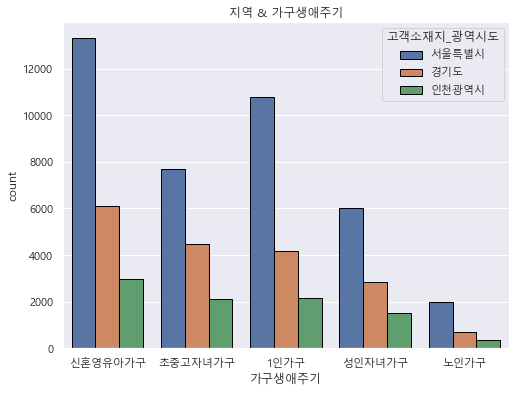

In [52]:
fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
sns.countplot(x = '가구생애주기', data = data_s, edgecolor = 'black', hue = '고객소재지_광역시도')
ax.set_title('지역 & 가구생애주기')


Text(0.5, 1.0, '인천광역시 가구생애주기')

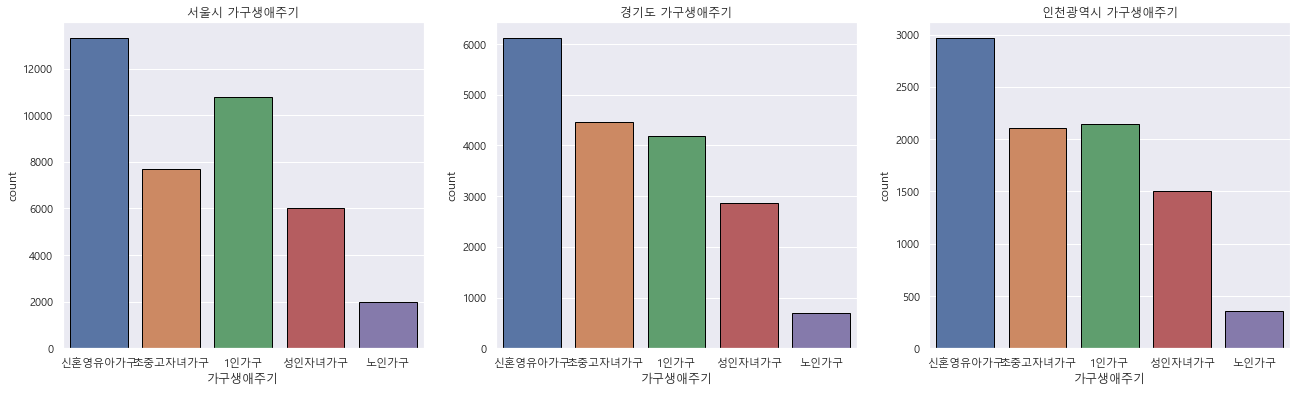

In [53]:
#도시별 가구생애주기
fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
group_names = ['신혼영유아가구','초중고자녀가구', '1인가구', '성인자녀가구', '노인가구']
sns.countplot(x = '가구생애주기', data = data_s_Seoul, ax = ax[0], edgecolor = 'black', order=group_names)
ax[0].set_title('서울시 가구생애주기')

#경기도 중분류
sns.countplot(x = '가구생애주기', data = data_s_Gyeong, ax = ax[1], edgecolor = 'black', order=group_names)
ax[1].set_title('경기도 가구생애주기')

#인천광역시 중분류
sns.countplot(x = '가구생애주기', data = data_s_Incheon, ax = ax[2], edgecolor = 'black', order=group_names)
ax[2].set_title('인천광역시 가구생애주기')


#서울시가 1인가구가 많음

In [54]:
data_s['기준년월'].groupby(data_s['고객소재지_광역시도']).value_counts()

고객소재지_광역시도  기준년월  
경기도         202003    4580
            202103    4488
            201909    4289
            202009    2532
            201903    2448
서울특별시       202003    9714
            202103    9560
            201909    9200
            202009    5838
            201903    5497
인천광역시       202103    2239
            202003    2202
            201909    2049
            202009    1309
            201903    1286
Name: 기준년월, dtype: int64

In [55]:
def get_M(feature):
    #데이터 정렬
    data_s_Seoul.sort_values(by = [feature], inplace=True)
    data_s_Gyeong.sort_values(by = [feature], inplace=True)
    data_s_Incheon.sort_values(by = [feature], inplace=True)

    #빈도수체크
    print(data_s[feature].groupby(data_s['고객소재지_광역시도']).value_counts())

    #서울시 중분류
    fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
    group_names = ['여행', '취미/특기', '문화', '스포츠', '레저']
    sns.countplot(x = '품목중분류명', data = data_s_Seoul, ax = ax[0],edgecolor = 'black', order=group_names, hue = feature)
    ax[0].legend(loc = 'upper right')
    ax[0].set_title('서울시 품목중분류')

    #경기도 중분류
    sns.countplot(x = '품목중분류명', data = data_s_Gyeong, ax = ax[1],edgecolor = 'black', order=group_names,hue = feature)
    ax[1].legend(loc = 'upper right')
    ax[1].set_title('경기도 품목중분류')

    #인천광역시 중분류
    sns.countplot(x = '품목중분류명', data = data_s_Incheon, ax = ax[2], edgecolor = 'black', order= group_names, hue = feature)
    ax[2].legend(loc = 'upper right')
    ax[2].set_title('인천광역시 품목중분류')

<ipython-input-55-3b67d7b6f18b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-55-3b67d7b6f18b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-55-3b67d7b6f18b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도  가구생애주기 
경기도         신혼영유아가구     6125
            초중고자녀가구     4471
            1인가구        4182
            성인자녀가구      2864
            노인가구         695
서울특별시       신혼영유아가구    13331
            1인가구       10782
            초중고자녀가구     7686
            성인자녀가구      6017
            노인가구        1993
인천광역시       신혼영유아가구     2970
            1인가구        2145
            초중고자녀가구     2106
            성인자녀가구      1503
            노인가구         361
Name: 가구생애주기, dtype: int64


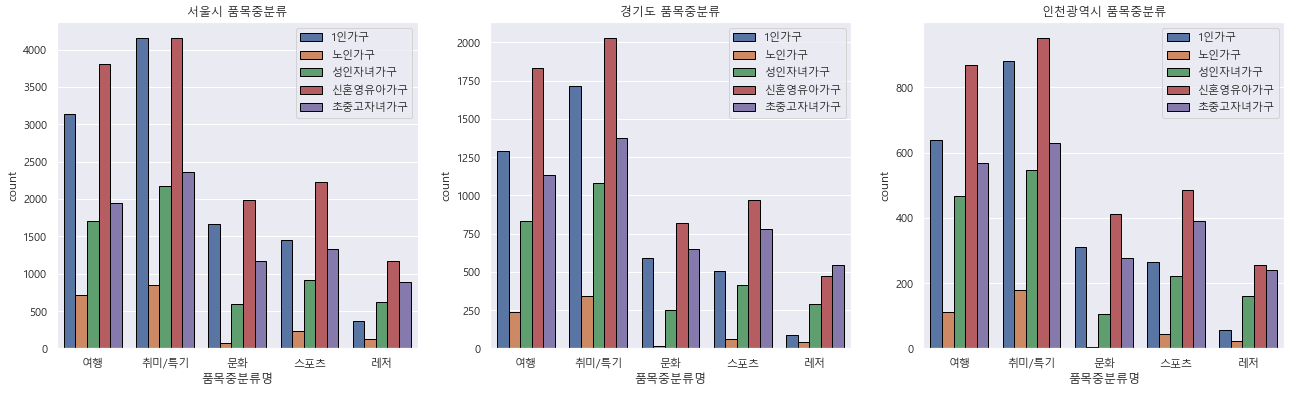

In [56]:
get_M('가구생애주기')

<ipython-input-55-3b67d7b6f18b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-55-3b67d7b6f18b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-55-3b67d7b6f18b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도  기준년월  
경기도         202003    4580
            202103    4488
            201909    4289
            202009    2532
            201903    2448
서울특별시       202003    9714
            202103    9560
            201909    9200
            202009    5838
            201903    5497
인천광역시       202103    2239
            202003    2202
            201909    2049
            202009    1309
            201903    1286
Name: 기준년월, dtype: int64


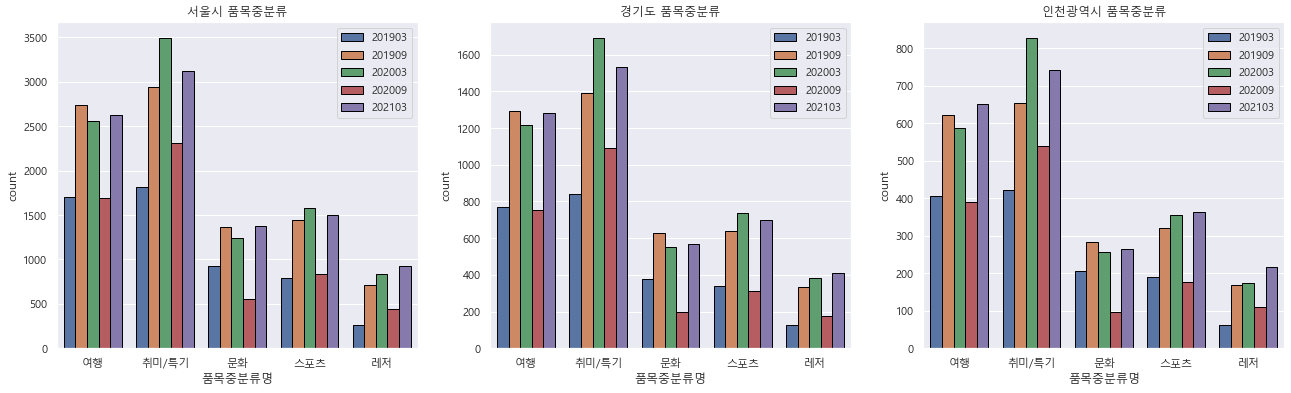

In [57]:
get_M('기준년월')

<ipython-input-58-3443647219a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Seoul.sort_values(by = ['품목중분류명'], inplace=True)
<ipython-input-58-3443647219a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Gyeong.sort_values(by = ['품목중분류명'], inplace=True)
<ipython-input-58-3443647219a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Incheon.sort_values(by = ['품목중분류명'], inplace=True)


고객소재지_광역시도  품목중분류명
경기도         취미/특기      6544
            여행         5317
            스포츠        2726
            문화         2319
            레저         1431
서울특별시       취미/특기     13698
            여행        11317
            스포츠        6144
            문화         5472
            레저         3178
인천광역시       취미/특기      3185
            여행         2655
            스포츠        1405
            문화         1110
            레저          730
Name: 품목중분류명, dtype: int64


Text(0.5, 1.0, '인천광역시 품목중분류')

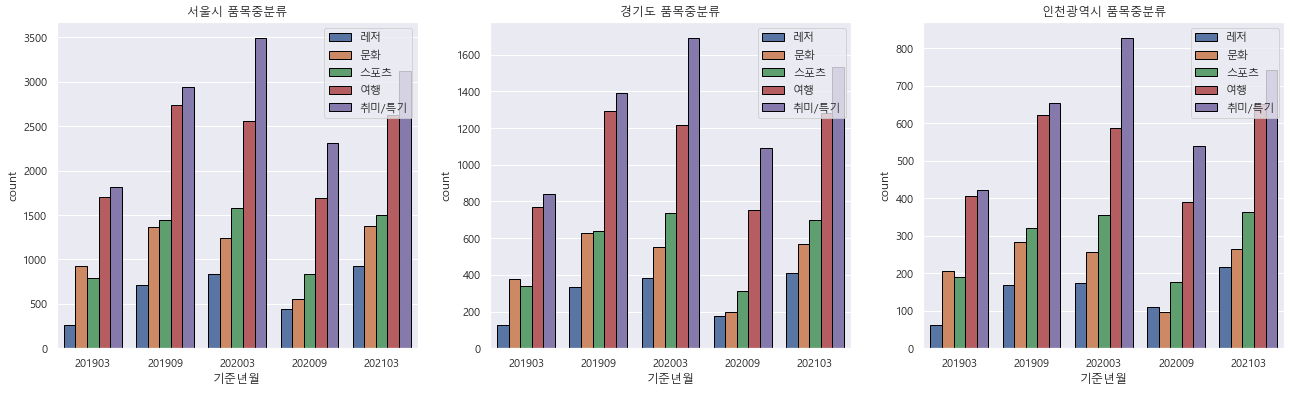

In [58]:
data_s_Seoul.sort_values(by = ['품목중분류명'], inplace=True)
data_s_Gyeong.sort_values(by = ['품목중분류명'], inplace=True)
data_s_Incheon.sort_values(by = ['품목중분류명'], inplace=True)

#빈도수체크
print(data_s['품목중분류명'].groupby(data_s['고객소재지_광역시도']).value_counts())

#서울시 중분류
fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
sns.countplot(x = '기준년월', data = data_s_Seoul, ax = ax[0],edgecolor = 'black', hue = '품목중분류명')
ax[0].legend(loc = 'upper right')
ax[0].set_title('서울시 품목중분류')

#경기도 중분류
sns.countplot(x = '기준년월', data = data_s_Gyeong, ax = ax[1],edgecolor = 'black',hue = '품목중분류명')
ax[1].legend(loc = 'upper right')
ax[1].set_title('경기도 품목중분류')

#인천광역시 중분류
sns.countplot(x = '기준년월', data = data_s_Incheon, ax = ax[2], edgecolor = 'black', hue = '품목중분류명')
ax[2].legend(loc = 'upper right')
ax[2].set_title('인천광역시 품목중분류')

<AxesSubplot:xlabel='기준년월', ylabel='count'>

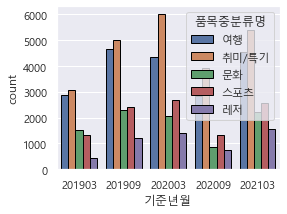

In [59]:
fig, ax = plt.subplots(1, 1, figsize = (4 ,3))
sns.countplot(x = '기준년월', data = data_s, hue = '품목중분류명',edgecolor = 'black')

In [60]:
def get_M_count(feature, feature2):
    #데이터 정렬
    data_s_Seoul.sort_values(by = [feature], inplace=True)
    data_s_Gyeong.sort_values(by = [feature], inplace=True)
    data_s_Incheon.sort_values(by = [feature], inplace=True)

    #빈도수체크
    print(data_s[feature].groupby(data_s['고객소재지_광역시도']).value_counts())

    #서울시 중분류
    fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
    group_names = data_s[feature2].unique().tolist()
    sns.countplot(x = feature2, data = data_s_Seoul, ax = ax[0],edgecolor = 'black', order= group_names,hue = feature)
    ax[0].legend(loc = 'upper right')
    ax[0].set_title('서울시 품목중분류')

    #경기도 중분류
    sns.countplot(x = feature2, data = data_s_Gyeong, ax = ax[1],edgecolor = 'black', order= group_names,hue = feature)
    ax[1].legend(loc = 'upper right')
    ax[1].set_title('경기도 품목중분류')

    #인천광역시 중분류
    sns.countplot(x = feature2, data = data_s_Incheon, ax = ax[2], edgecolor = 'black', order = group_names ,hue = feature)
    ax[2].legend(loc = 'upper right')
    ax[2].set_title('인천광역시 품목중분류')


#barplot를 통해 평균 시각화하는 함수
def get_M_bar(feature, feature2, y,ylim):
    #데이터 정렬
    data_s_Seoul.sort_values(by = [feature], inplace=True)
    data_s_Gyeong.sort_values(by = [feature], inplace=True)
    data_s_Incheon.sort_values(by = [feature], inplace=True)

    #빈도수체크
    print(data_s[y].groupby(data_s['고객소재지_광역시도']).mean())

    #서울시 중분류
    fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
    group_names = data_s[feature2].unique().tolist()
    sns.barplot(x = feature2, y = y, data = data_s_Seoul, ax = ax[0],edgecolor = 'black', order= group_names,hue = feature)
    ax[0].legend(loc = 'upper right')
    ax[0].set(ylim =ylim)
    ax[0].set_title('서울시 품목중분류')

    #경기도 중분류
    sns.barplot(x = feature2, y = y,data = data_s_Gyeong, ax = ax[1],edgecolor = 'black', order= group_names,hue = feature)
    ax[1].legend(loc = 'upper right')
    ax[1].set(ylim = ylim)
    ax[1].set_title('경기도 품목중분류')

    #인천광역시 중분류
    sns.barplot(x = feature2, y = y,data = data_s_Incheon, ax = ax[2], edgecolor = 'black', order = group_names ,hue = feature)
    ax[2].legend(loc = 'upper right')
    ax[2].set(ylim =ylim)
    ax[2].set_title('인천광역시 품목중분류')

def get_M_box(feature, feature2, y):
    #데이터 정렬
    data_s_Seoul.sort_values(by = [feature], inplace=True)
    data_s_Gyeong.sort_values(by = [feature], inplace=True)
    data_s_Incheon.sort_values(by = [feature], inplace=True)

    #빈도수체크
    print(data_s[y].groupby(data_s['고객소재지_광역시도']).mean())

    #서울시 중분류
    fig, ax = plt.subplots(figsize = (22, 6), ncols= 3)
    group_names = data_s[feature2].unique().tolist()
    sns.boxplot(x = feature2, y = y, data = data_s_Seoul, ax = ax[0], order= group_names,hue = feature)
    ax[0].legend(loc = 'upper right')
    ax[0].set_title('서울시 품목중분류')

    #경기도 중분류
    sns.boxplot(x = feature2, y = y,data = data_s_Gyeong, ax = ax[1], order= group_names,hue = feature)
    ax[1].legend(loc = 'upper right')
    ax[1].set_title('경기도 품목중분류')

    #인천광역시 중분류
    sns.boxplot(x = feature2, y = y,data = data_s_Incheon, ax = ax[2], order = group_names ,hue = feature)
    ax[2].legend(loc = 'upper right')
    ax[2].set_title('인천광역시 품목중분류')

<ipython-input-60-ba08232029ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-60-ba08232029ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-60-ba08232029ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도  품목중분류명
경기도         취미/특기      6544
            여행         5317
            스포츠        2726
            문화         2319
            레저         1431
서울특별시       취미/특기     13698
            여행        11317
            스포츠        6144
            문화         5472
            레저         3178
인천광역시       취미/특기      3185
            여행         2655
            스포츠        1405
            문화         1110
            레저          730
Name: 품목중분류명, dtype: int64


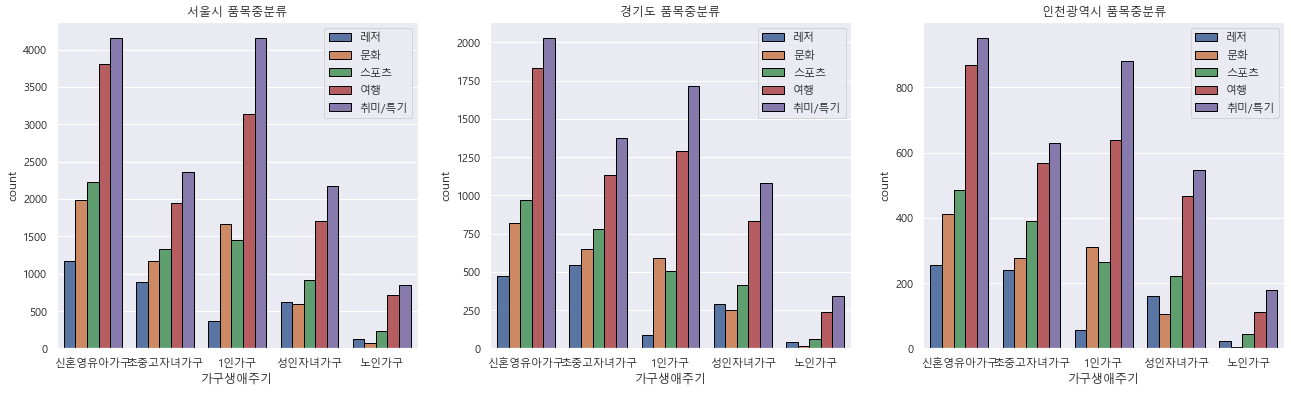

In [61]:
get_M_count('품목중분류명', '가구생애주기')

C:\Users\dudtj\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


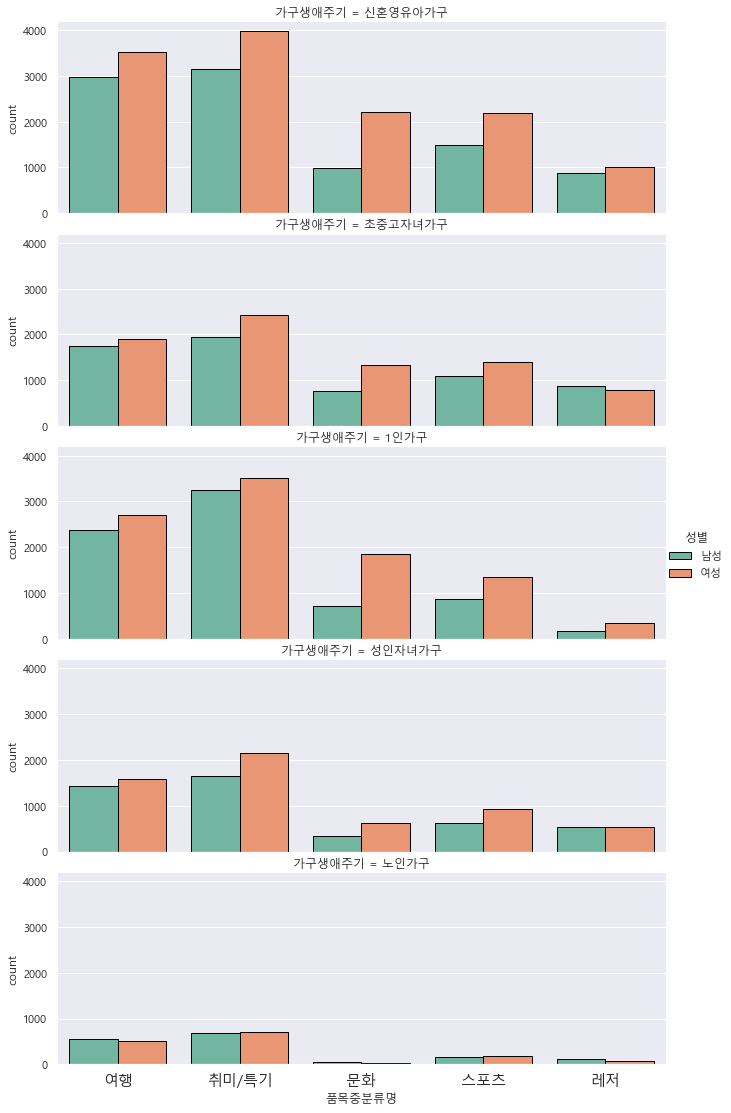

In [62]:
f=sns.factorplot(x = '품목중분류명', data = data_s, edgecolor= 'black', palette='Set2', hue = '성별', row = '가구생애주기', kind = 'count', aspect = 2)
f.fig.set_size_inches(10, 15)
f.set_xticklabels(['여행','취미/특기','문화','스포츠','레저'], fontsize= 15)
plt.show()

<ipython-input-60-ba08232029ef>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-60-ba08232029ef>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-60-ba08232029ef>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도
경기도      186.302407
서울특별시    241.595289
인천광역시    202.044694
Name: 매출금액(단위:만원), dtype: float64


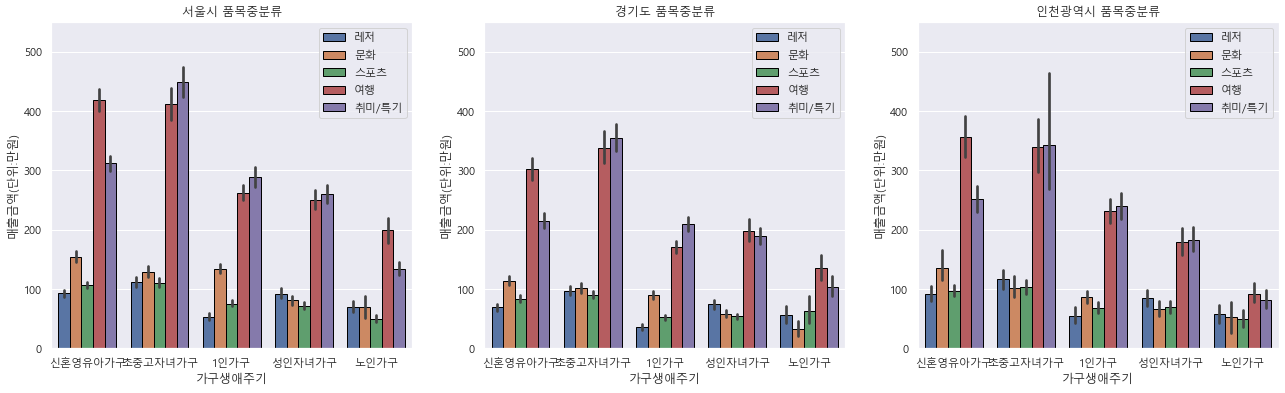

In [63]:
get_M_bar('품목중분류명', '가구생애주기', y = '매출금액(단위:만원)',ylim = [0, 550])


In [64]:
# data_s_Seoul_Gwan = data_s_Seoul[data_s_Seoul['고객소재지_시군구'] == '관악구']
# data_s_Seoul_Gwan
# fig, ax = plt.subplots(1, 1, figsize = (8 ,6))
# group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
# ax.set(ylim = (0, 1000))
# sns.countplot(x = '가구생애주기', data= data_s_Seoul_Gwan, order=group_names)
# plt.title("관악구")

<AxesSubplot:title={'center':'성동구'}, xlabel='가구생애주기', ylabel='count'>

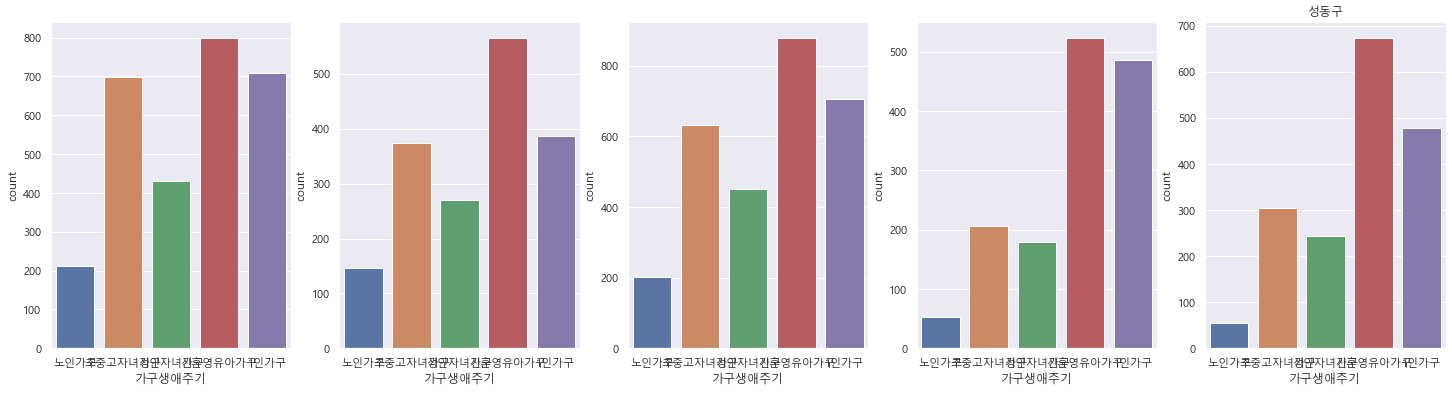

In [65]:
figure,((ax1,ax2,ax3,ax4,ax5))=plt.subplots(figsize=(25,6),nrows=1,ncols=5)
data_s_Seoul_GN = data_s_Seoul[data_s_Seoul['고객소재지_시군구'] == '강남구']
data_s_Seoul_GN
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("강남구")
sns.countplot(x = '가구생애주기', data= data_s_Seoul_GN, order=group_names,ax=ax1)

data_s_Seoul_SC = data_s_Seoul[data_s_Seoul['고객소재지_시군구'] == '서초구']
data_s_Seoul_SC
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("서초구")
sns.countplot(x = '가구생애주기', data= data_s_Seoul_SC, order=group_names,ax=ax2)


data_s_Seoul_SP = data_s_Seoul[data_s_Seoul['고객소재지_시군구'] == '송파구']
data_s_Seoul_SP
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("송파구")
sns.countplot(x = '가구생애주기', data= data_s_Seoul_SP, order=group_names,ax=ax3)


data_s_Seoul_YS = data_s_Seoul[data_s_Seoul['고객소재지_시군구'] == '용산구']
data_s_Seoul_YS
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("용산구")
sns.countplot(x = '가구생애주기', data= data_s_Seoul_YS, order=group_names,ax=ax4)


data_s_Seoul_SD = data_s_Seoul[data_s_Seoul['고객소재지_시군구'] == '성동구']
data_s_Seoul_SD
group_names = ['노인가구', '초중고자녀가구', '성인자녀가구', '신혼영유아가구', '1인가구']
ax.set(ylim = (0, 1000))
plt.title("성동구")
sns.countplot(x = '가구생애주기', data= data_s_Seoul_SD, order=group_names,ax=ax5)


<ipython-input-60-ba08232029ef>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-60-ba08232029ef>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-60-ba08232029ef>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도
경기도      6.720142
서울특별시    7.002696
인천광역시    5.875039
Name: 건당 매출금액(단위:만원), dtype: float64


<ipython-input-60-ba08232029ef>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-60-ba08232029ef>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-60-ba08232029ef>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도
경기도      29.285270
서울특별시    38.110503
인천광역시    36.854816
Name: 매출건수, dtype: float64


<ipython-input-60-ba08232029ef>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Seoul.sort_values(by = [feature], inplace=True)
<ipython-input-60-ba08232029ef>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Gyeong.sort_values(by = [feature], inplace=True)
<ipython-input-60-ba08232029ef>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s_Incheon.sort_values(by = [feature], inplace=True)


고객소재지_광역시도
경기도      186.302407
서울특별시    241.595289
인천광역시    202.044694
Name: 매출금액(단위:만원), dtype: float64


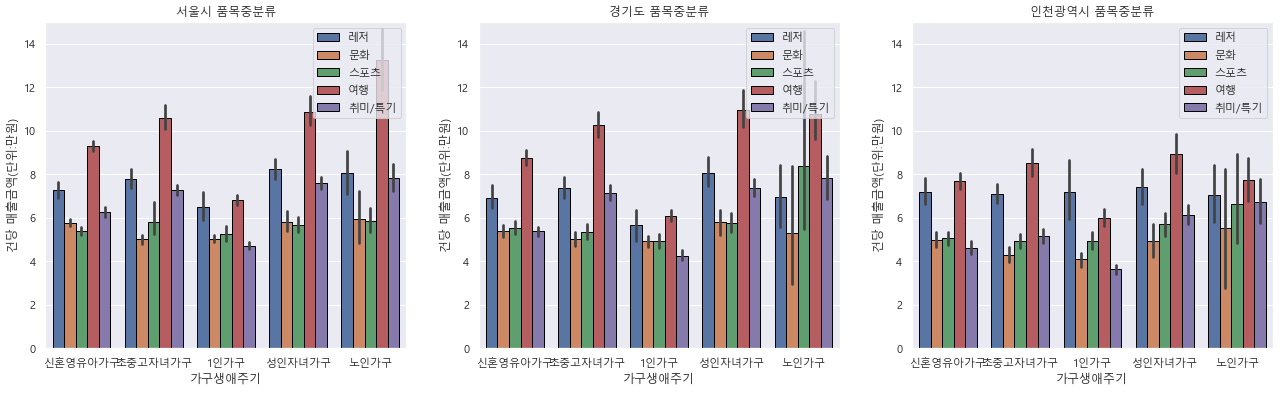

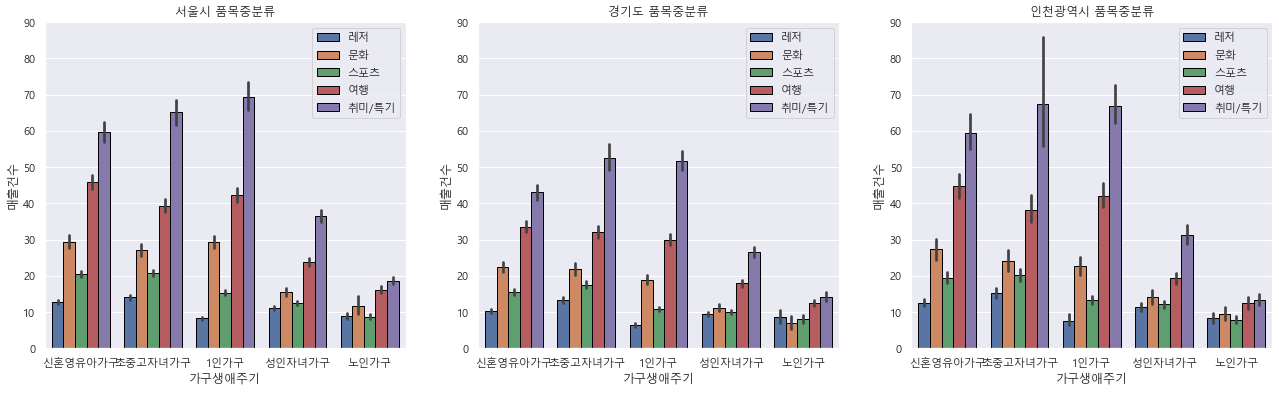

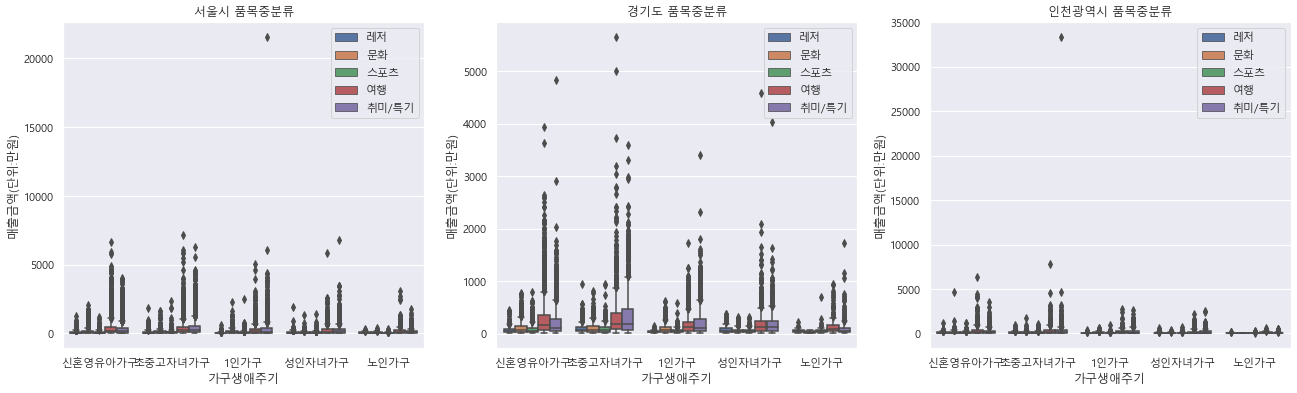

In [66]:
get_M_bar('품목중분류명', '가구생애주기', y = '건당 매출금액(단위:만원)',ylim=[0,15])
get_M_bar('품목중분류명', '가구생애주기', y = '매출건수',ylim = [0, 90])
get_M_box('품목중분류명', '가구생애주기', y = '매출금액(단위:만원)')

In [67]:
def cut_point(quanti, data):
    a = quanti
    cut_po=data['건당 매출금액(단위:만원)'].quantile(a)
    df_cut=data[data['건당 매출금액(단위:만원)'] < cut_po]
    plt.figure(figsize=(8, 6))
    df_cut['건당 매출금액(단위:만원)'].hist()
    plt.show()

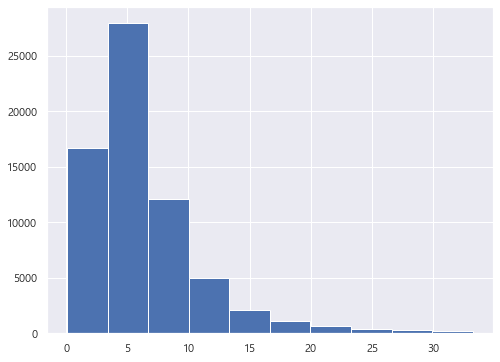

In [68]:
cut_point(0.99, data_s)